# Clustering practice
## Using Iris dataset K-Means, DBSCAN, Hierarchical Clustering

## 1. Load libraries and data

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [124]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# DataFrame create
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

print("dataset information:")
print(df.info())
print("\ndata sample:")
df.head()

dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

data sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Data exploration and visualization

In [126]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


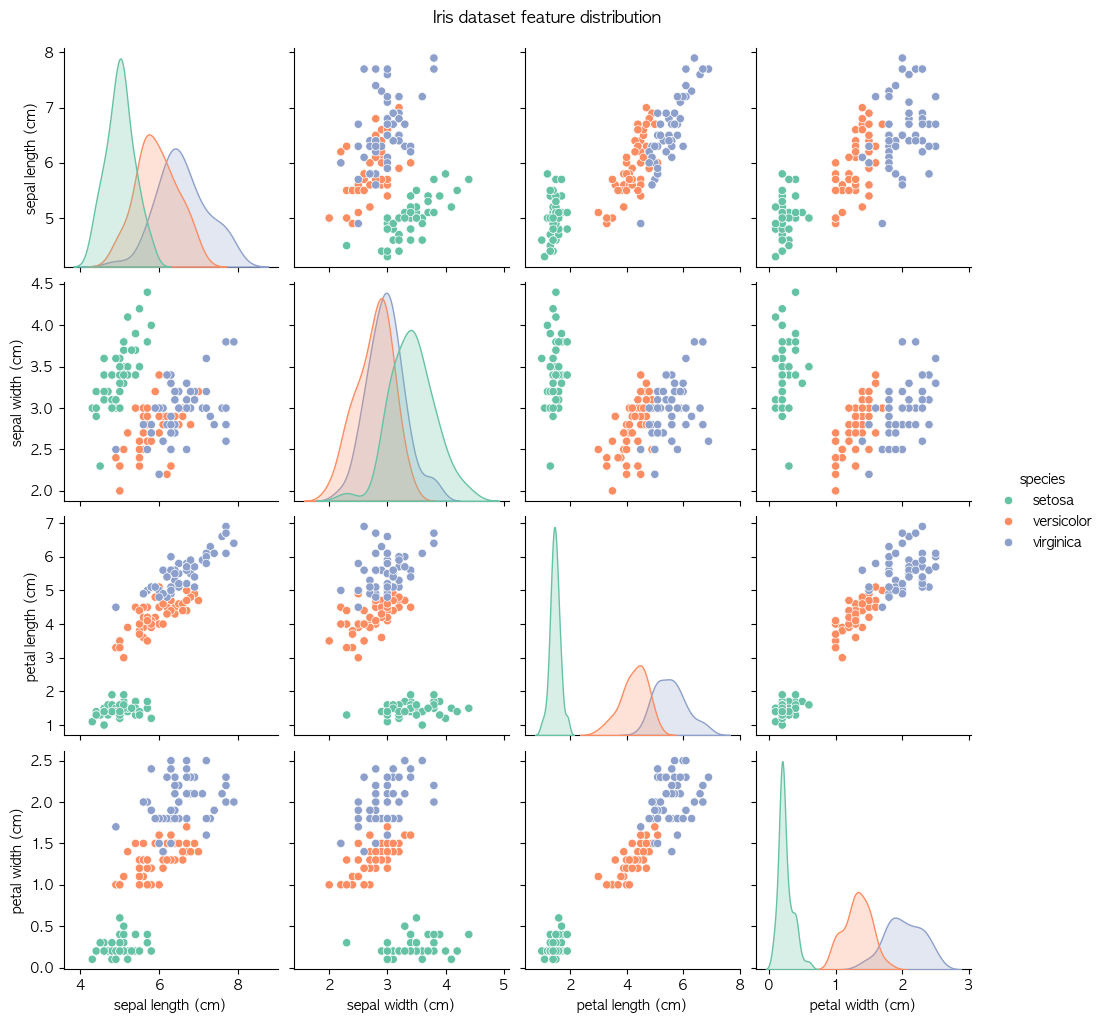

In [127]:
# Check data distribution with Pairplot
sns.pairplot(df, hue='species', palette='Set2', diag_kind='kde')
plt.suptitle('Iris dataset feature distribution', y=1.02)
plt.show()

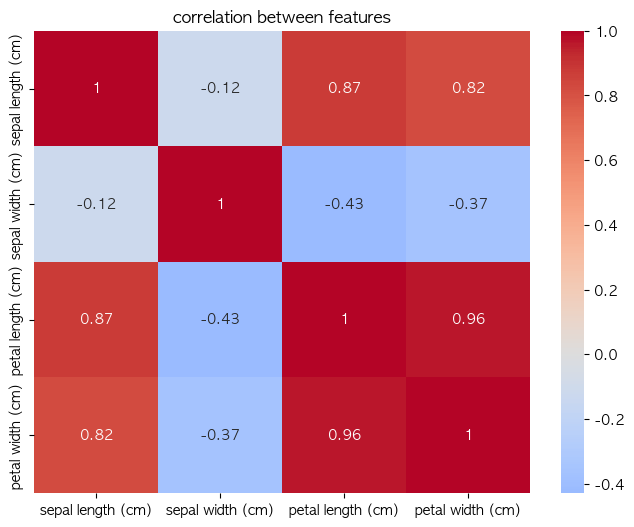

In [128]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('correlation between features')
plt.show()

## 3. Data preprocessing

In [130]:
# Standardization (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original Data Mean:", X.mean(axis=0))
print("Scaled Data Mean:", X_scaled.mean(axis=0))
print("\nOriginal Data Standard Deviation:", X.std(axis=0))
print("Scaled Data Standard Deviation:", X_scaled.std(axis=0))

Original Data Mean: [5.84333333 3.05733333 3.758      1.19933333]
Scaled Data Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Original Data Standard Deviation: [0.82530129 0.43441097 1.75940407 0.75969263]
Scaled Data Standard Deviation: [1. 1. 1. 1.]


## 4. K-Means Clustering

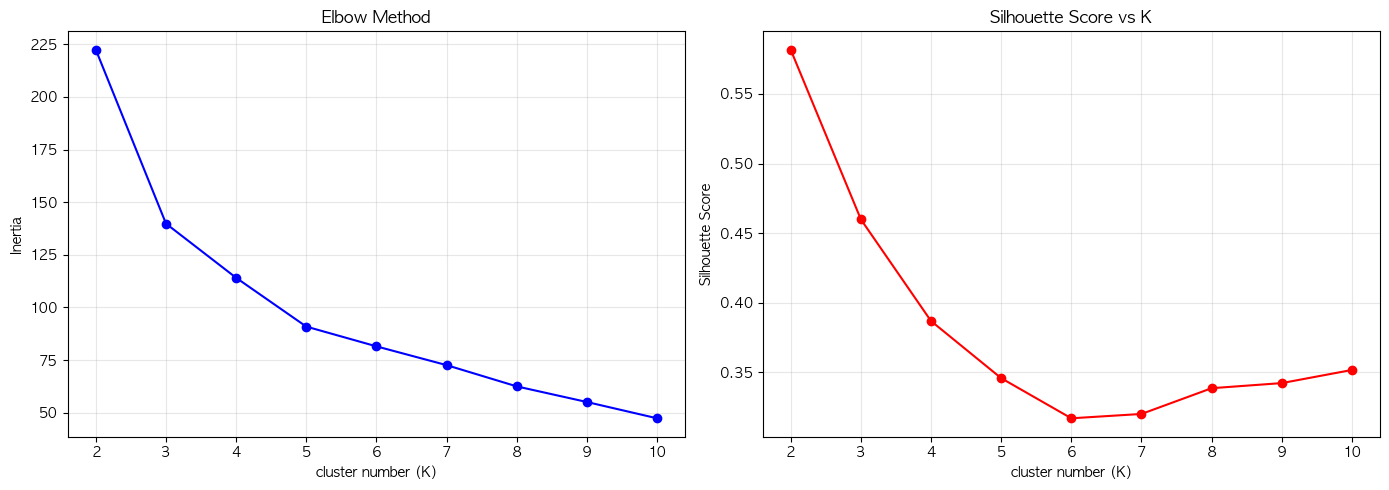

In [132]:
# Elbow Method: find optimize K
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Method visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('cluster number (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('cluster number (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [133]:
# Run K-Means as K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means clustering result:")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, kmeans_labels):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.3f}")

K-Means clustering result:
Silhouette Score: 0.460
Davies-Bouldin Index: 0.834
Calinski-Harabasz Score: 241.904


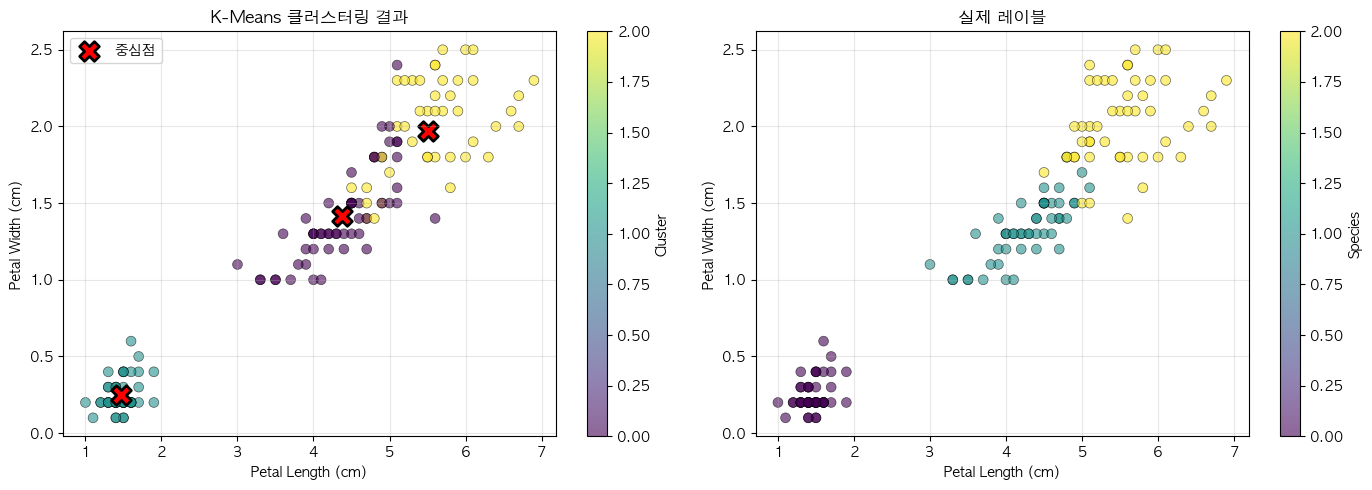

In [134]:
# K-Means result visualization (2D)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# clustering result
scatter1 = axes[0].scatter(X[:, 2], X[:, 3], c=kmeans_labels, cmap='viridis', 
                           s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 2], 
                scaler.inverse_transform(kmeans.cluster_centers_)[:, 3], 
                c='red', marker='X', s=200, edgecolors='black', linewidth=2, label='중심점')
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')
axes[0].set_title('K-Means 클러스터링 결과')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# real label
scatter2 = axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', 
                           s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].set_title('실제 레이블')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Species')

plt.tight_layout()
plt.show()

## 5. DBSCAN clustering

In [136]:
# DBSCAN run
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# number of noise point
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("DBSCAN clustering result:")
print(f"number of clustering: {n_clusters}")
print(f"number of noise point: {n_noise}")

if n_clusters > 1:
    # evaluation without noise
    mask = dbscan_labels != -1
    print(f"Silhouette Score: {silhouette_score(X_scaled[mask], dbscan_labels[mask]):.3f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled[mask], dbscan_labels[mask]):.3f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask]):.3f}")

DBSCAN clustering result:
number of clustering: 2
number of noise point: 34
Silhouette Score: 0.656
Davies-Bouldin Index: 0.494
Calinski-Harabasz Score: 343.968


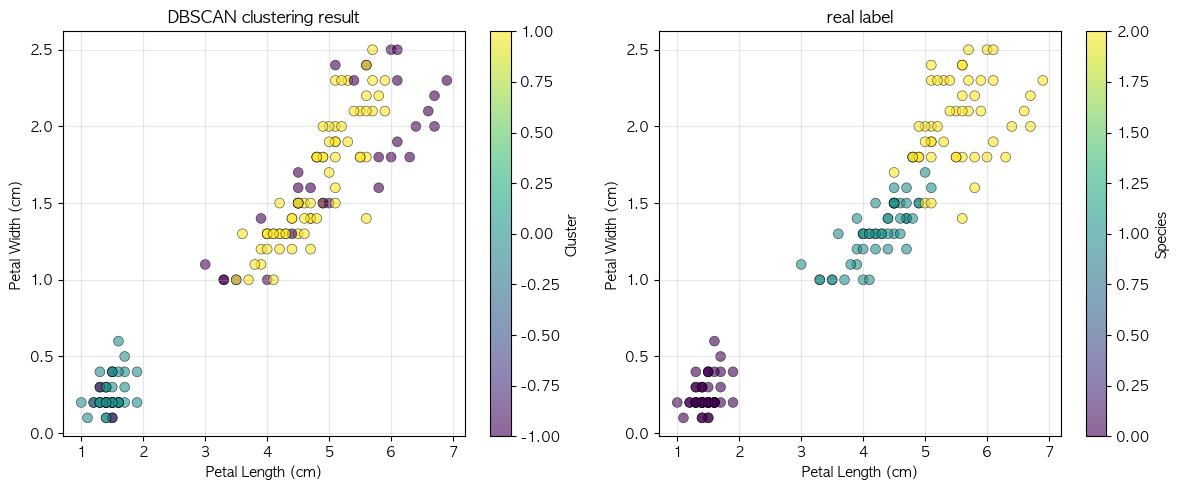

In [137]:
# DBSCAN result visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 2], X[:, 3], c=dbscan_labels, cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('DBSCAN clustering result')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', 
                      s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('real label')
plt.colorbar(scatter2, label='Species')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Hierarchical Clustering

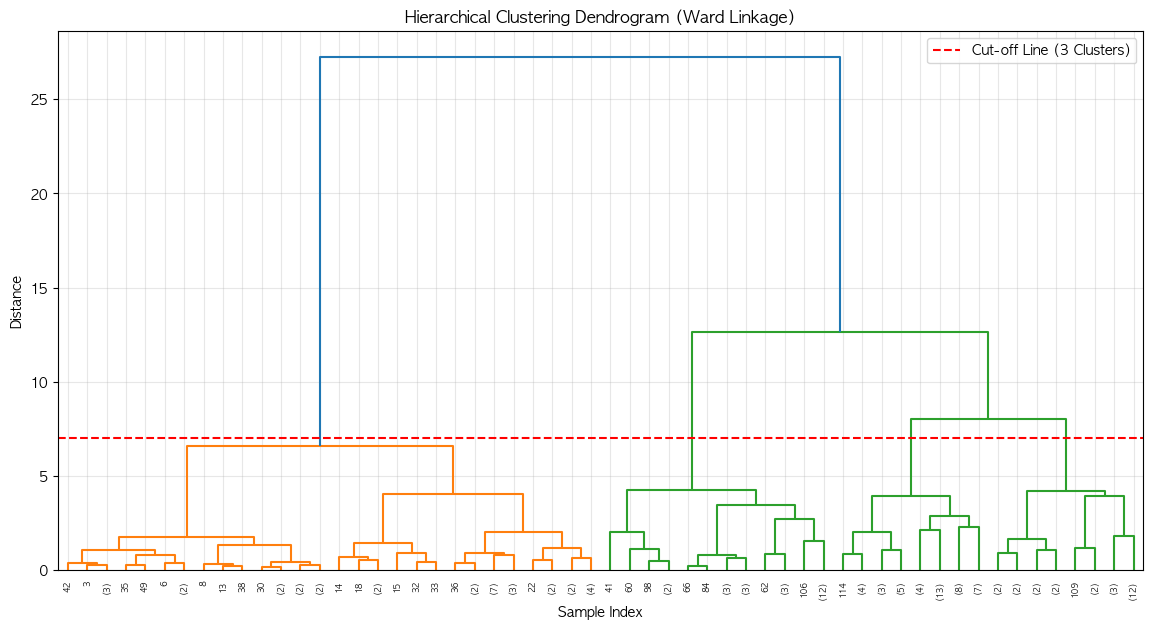

In [139]:
# Create Dendrogram
plt.figure(figsize=(14, 7))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--', label='Cut-off Line (3 Clusters)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [140]:
# Agglomerative Clustering 
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

print("Hierarchical Clustering Result:")
print(f"Silhouette Score: {silhouette_score(X_scaled, agg_labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, agg_labels):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, agg_labels):.3f}")

Hierarchical Clustering Result:
Silhouette Score: 0.447
Davies-Bouldin Index: 0.803
Calinski-Harabasz Score: 222.719


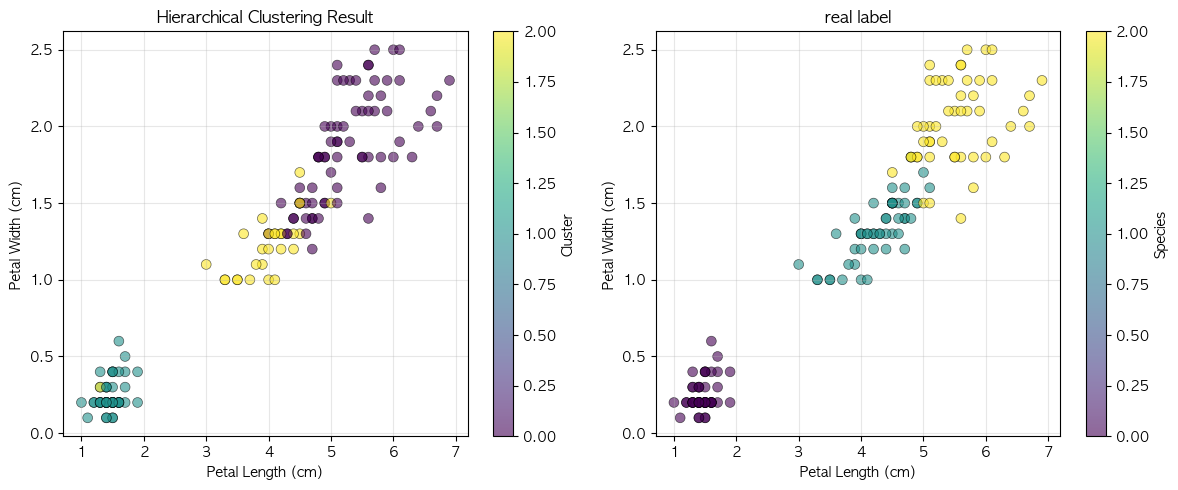

In [141]:
# Hierarchical Clustering Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 2], X[:, 3], c=agg_labels, cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Hierarchical Clustering Result')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', 
                      s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('real label')
plt.colorbar(scatter2, label='Species')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Compare algorithm

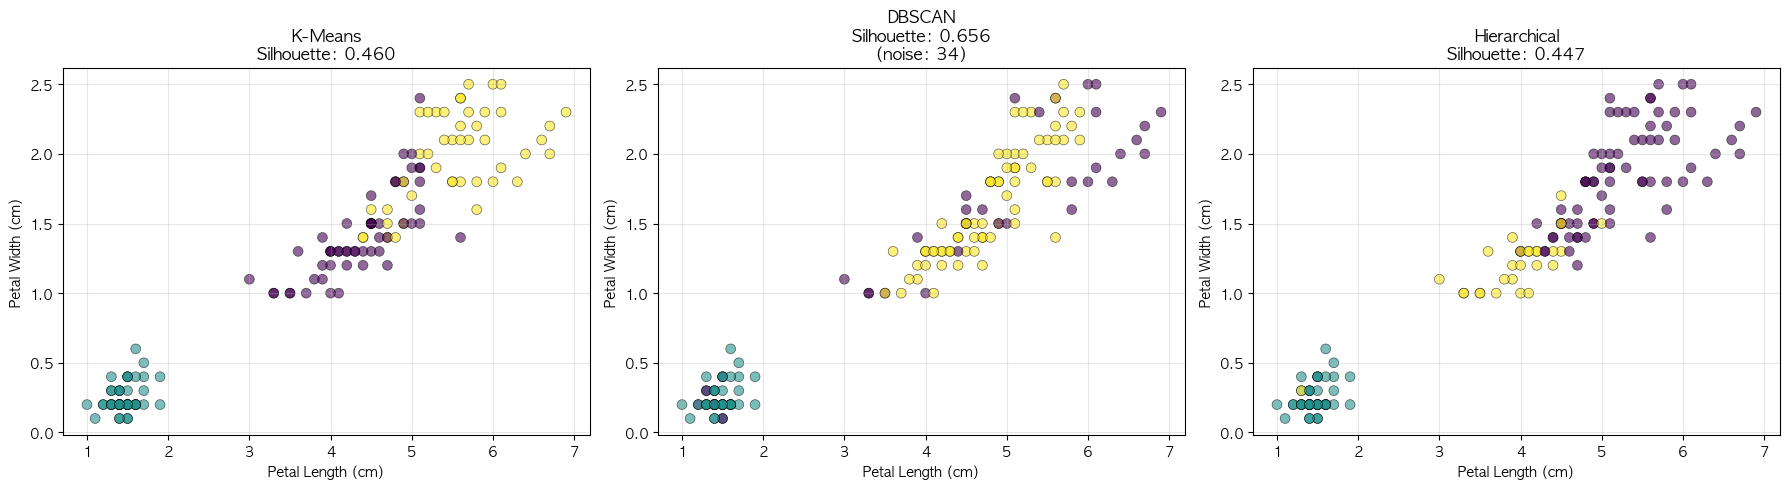

In [143]:
# Compare three algorithm result
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
axes[0].scatter(X[:, 2], X[:, 3], c=kmeans_labels, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')
axes[0].set_title(f'K-Means\nSilhouette: {silhouette_score(X_scaled, kmeans_labels):.3f}')
axes[0].grid(True, alpha=0.3)

# DBSCAN
axes[1].scatter(X[:, 2], X[:, 3], c=dbscan_labels, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
if n_clusters > 1:
    mask = dbscan_labels != -1
    sil_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    axes[1].set_title(f'DBSCAN\nSilhouette: {sil_score:.3f}\n(noise: {n_noise})')
else:
    axes[1].set_title(f'DBSCAN\n(number of cluster: {n_clusters}, noise: {n_noise})')
axes[1].grid(True, alpha=0.3)

# Hierarchical
axes[2].scatter(X[:, 2], X[:, 3], c=agg_labels, cmap='viridis', 
               s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Petal Length (cm)')
axes[2].set_ylabel('Petal Width (cm)')
axes[2].set_title(f'Hierarchical\nSilhouette: {silhouette_score(X_scaled, agg_labels):.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [144]:
# Comparison of Evaluation Metrics
comparison_df = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [
        silhouette_score(X_scaled, kmeans_labels),
        silhouette_score(X_scaled[mask], dbscan_labels[mask]) if n_clusters > 1 else 0,
        silhouette_score(X_scaled, agg_labels)
    ],
    'Davies-Bouldin Index': [
        davies_bouldin_score(X_scaled, kmeans_labels),
        davies_bouldin_score(X_scaled[mask], dbscan_labels[mask]) if n_clusters > 1 else 0,
        davies_bouldin_score(X_scaled, agg_labels)
    ],
    'Calinski-Harabasz Score': [
        calinski_harabasz_score(X_scaled, kmeans_labels),
        calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask]) if n_clusters > 1 else 0,
        calinski_harabasz_score(X_scaled, agg_labels)
    ],
    'Number of Clusters': [3, n_clusters, 3]
})

print("\n=== Comparison of Clustering Algorithm Performance ===")
print("\nEvaluation Metric Interpretation:")
print("- Silhouette Score: The higher, the better (range: -1 to 1)")
print("- Davies-Bouldin Index: The lower, the better (closer to 0 is ideal)")
print("- Calinski-Harabasz Score: The higher, the better\n")
comparison_df


=== Comparison of Clustering Algorithm Performance ===

Evaluation Metric Interpretation:
- Silhouette Score: The higher, the better (range: -1 to 1)
- Davies-Bouldin Index: The lower, the better (closer to 0 is ideal)
- Calinski-Harabasz Score: The higher, the better



,Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score,Number of Clusters
0,K-Means,0.459948,0.833595,241.904402,3
1,DBSCAN,0.655889,0.494216,343.968085,2
2,Hierarchical,0.446689,0.803467,222.719164,3


# 8. Conclusion
### Characteristics of Each Algorithm

**K-Means**
- Advantages: Fast, simple, and effective for spherical-shaped clusters.
- Disadvantages: Requires the number of clusters to be specified in advance and is sensitive to outliers.
- Best suited for: Cases where the number of clusters is known and the data forms roughly spherical distributions.

**DBSCAN**
- Advantages: Does not require predefining the number of clusters, can detect arbitrarily shaped clusters, and is capable of identifying outliers.
- Disadvantages: Struggles with clusters of varying densities and is sensitive to parameter selection.
- Best suited for: Datasets with outliers or clusters of complex, irregular shapes.

**Hierarchical Clustering**
- Advantages: Reveals hierarchical relationships between clusters and allows flexible determination of the number of clusters.
- Disadvantages: Computationally expensive and less suitable for large datasets.
- Best suited for: Understanding hierarchical structures within data or working with small datasets.